# Example 3: Deep Formulas

The orignal Kolmogorov-Arnold theorem says that it suffices to have 2-Layer function composition (inner and outer functions), but the functions might be non-smooth or even fractal. We generalize KA representation to arbitrary depths. An example a 2-Layer KAN (with smooth activations) is unable to do is: $f(x_1,x_2,x_3,x_4)={\rm exp}({\rm sin}(x_1^2+x_2^2)+{\rm sin}(x_3^2+x_4^2))$, which requires at least 3-Layer KANs.

### Three-layer KAN

In [6]:
from kan import *

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[4,2,1,1], grid=3, k=3, seed=1)
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=3000)

# train the model
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.002, lamb_entropy=2.);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.43e-02 | test_loss: 2.57e-02 | reg: 1.09e+01 | : 100%|█| 20/20 [00:17<00:00,  1.12it

saving model version 0.1


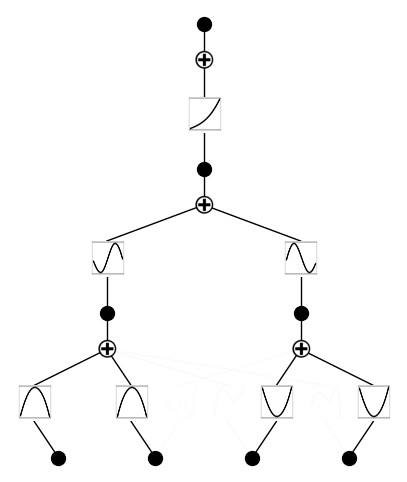

In [9]:
model.plot(beta=10)

In [10]:
model = model.prune(edge_th=1e-2)

saving model version 0.2


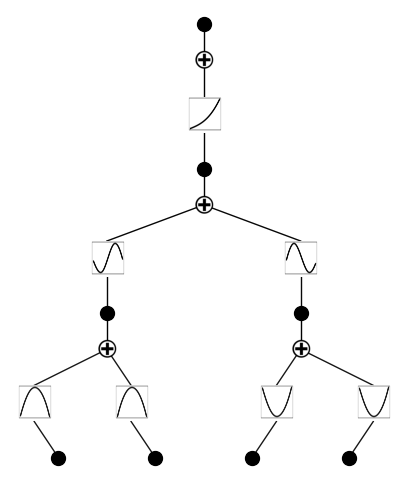

In [11]:
model.plot()

In [12]:
grids = [3,5,10,20,50]
#grids = [5]

train_rmse = []
test_rmse = []

for i in range(len(grids)):
    model = KAN(width=[4,2,1,1], grid=grids[i], k=3, seed=0).initialize_from_another_model(model, dataset['train_input'])
    results = model.fit(dataset, opt="LBFGS", steps=50, stop_grid_update_step=20);
    train_rmse.append(results['train_loss'][-1].item())
    test_rmse.append(results['test_loss'][-1].item())

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.40e-03 | test_loss: 5.50e-03 | reg: 1.08e+01 | : 100%|█| 50/50 [00:38<00:00,  1.30it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.10e-03 | test_loss: 2.13e-03 | reg: 1.09e+01 | : 100%|█| 50/50 [00:40<00:00,  1.25it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.80e-04 | test_loss: 1.68e-04 | reg: 1.09e+01 | : 100%|█| 50/50 [01:01<00:00,  1.23s/


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.95e-05 | test_loss: 2.68e-05 | reg: 1.09e+01 | : 100%|█| 50/50 [01:06<00:00,  1.33s/


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.86e-05 | test_loss: 3.86e-05 | reg: 1.09e+01 | : 100%|█| 50/50 [01:00<00:00,  1.21s/

saving model version 0.1


[0.005403829738497734, 0.0020968744065612555, 0.00017952092457562685, 3.950050086132251e-05, 2.864087036869023e-05]
[0.005496920086443424, 0.0021260427311062813, 0.00016824221529532224, 2.6780631742440164e-05, 3.8571961340494454e-05]


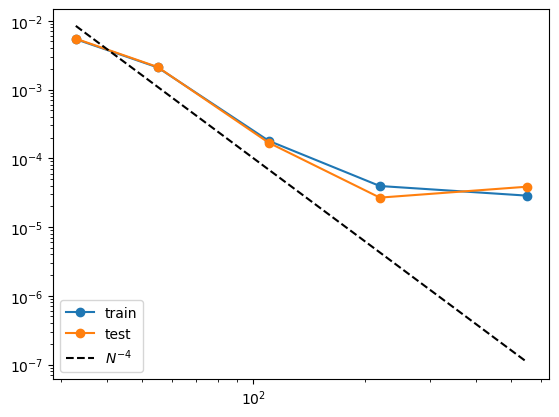

In [13]:
import numpy as np
import matplotlib.pyplot as plt

n_params = np.array(grids) * (4*2+2*1+1*1)
plt.plot(n_params, train_rmse, marker="o")
plt.plot(n_params, test_rmse, marker="o")
plt.plot(n_params, 10000*n_params**(-4.), color="black", ls="--")
plt.legend(['train', 'test', r'$N^{-4}$'], loc="lower left")
plt.xscale('log')
plt.yscale('log')
print(train_rmse)
print(test_rmse)

### Two-layer KAN

Now we show that a 2 two-layer KAN performs much worse for this task

In [14]:
from kan import KAN, create_dataset
import torch

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[4,9,1], grid=3, k=3, seed=0)
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=3000)

# train the model
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.002, lamb_entropy=2.);
model.plot(beta=10)

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.59e-02 | test_loss: 7.80e-02 | reg: 1.17e+01 | :  80%|▊| 16/20 [00:20<00:05,  1.25s/


KeyboardInterrupt: 

In [8]:
grids = [3,5,10,20,50]

train_rmse = []
test_rmse = []

for i in range(len(grids)):
    model = KAN(width=[4,9,1], grid=grids[i], k=3, seed=0).initialize_from_another_model(model, dataset['train_input'])
    results = model.fit(dataset, opt="LBFGS", steps=50, stop_grid_update_step=30);
    train_rmse.append(results['train_loss'][-1].item())
    test_rmse.append(results['test_loss'][-1].item())

train loss: 3.59e-02 | test loss: 5.23e-02 | reg: 1.04e+01 : 100%|██| 50/50 [01:18<00:00,  1.57s/it]
train loss: 2.28e-02 | test loss: 3.10e-02 | reg: 1.04e+01 : 100%|██| 50/50 [01:25<00:00,  1.70s/it]
train loss: 8.34e-03 | test loss: 1.09e-02 | reg: 1.03e+01 : 100%|██| 50/50 [01:32<00:00,  1.86s/it]
train loss: 5.71e-03 | test loss: 1.06e-02 | reg: 9.86e+00 : 100%|██| 50/50 [01:45<00:00,  2.10s/it]
train loss: 1.03e-02 | test loss: 6.30e-02 | reg: 9.68e+00 : 100%|██| 50/50 [01:57<00:00,  2.36s/it]


[0.035936225205659866, 0.02279285155236721, 0.00833611935377121, 0.005708411335945129, 0.010341067798435688]
[0.05229281634092331, 0.031011207029223442, 0.010879972018301487, 0.010645035654306412, 0.06304473429918289]


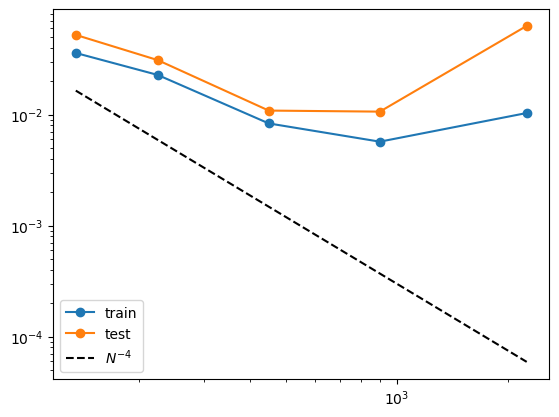

In [9]:
import numpy as np
import matplotlib.pyplot as plt

n_params = np.array(grids) * (4*9+9*1)
plt.plot(n_params, train_rmse, marker="o")
plt.plot(n_params, test_rmse, marker="o")
plt.plot(n_params, 300*n_params**(-2.), color="black", ls="--")
plt.legend(['train', 'test', r'$N^{-4}$'], loc="lower left")
plt.xscale('log')
plt.yscale('log')
print(train_rmse)
print(test_rmse)